In [7]:
df

,date,clock,stadium,class,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,h,60095.0,2,5,13,0,51.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,h,42212.0,7,2,6,1,40.3,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,h,17120.0,9,1,1,0,34.4,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,d,40130.0,12,1,4,1,64.4,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,d,25198.0,11,1,16,1,66.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,13/09/2020,2:00pm,The Hawthorns,a,0.0,24,0,18,3,35.8,...,36.0,4,1,12,9,1,1,0,0,https://www.skysports.com/football/west-bromwi...
1136,12/9/2020,8:00pm,London Stadium,a,0.0,14,0,4,2,58.3,...,59.5,0,3,13,7,2,2,0,0,https://www.skysports.com/football/west-ham-un...
1137,12/9/2020,5:30pm,Anfield,h,0.0,5,4,19,3,48.8,...,46.2,0,3,9,6,1,0,0,0,https://www.skysports.com/football/liverpool-v...
1138,12/9/2020,3:00pm,Selhurst Park,h,0.0,11,1,20,0,29.4,...,50.0,5,2,14,11,2,1,0,0,https://www.skysports.com/football/crystal-pal...


===== Descriptive Statistics for Numerical Columns =====
                          mean    median  mode       std_dev
attendance        26584.311404  29288.50   0.0  22827.967261
Home Team            11.450000     11.00   1.0      6.815784
Goals Home            1.502632      1.00   1.0      1.359450
Away Team            11.450000     11.00   1.0      6.815784
Away Goals            1.290351      1.00   1.0      1.233457
home_possessions     50.816754     50.85  35.2     12.896181
away_possessions     49.205965     49.20  64.8     12.899495
home_shots           13.558772     13.00  15.0      5.615658
away_shots           11.474561     11.00  10.0      5.048515
home_on               4.715789      5.00   5.0      2.564688
away_on               4.039474      4.00   3.0      2.359525
home_off              5.069298      5.00   5.0      2.621838
away_off              4.232456      4.00   4.0      2.448306
home_blocked          3.776316      3.00   3.0      2.562984
away_blocked          3.2035

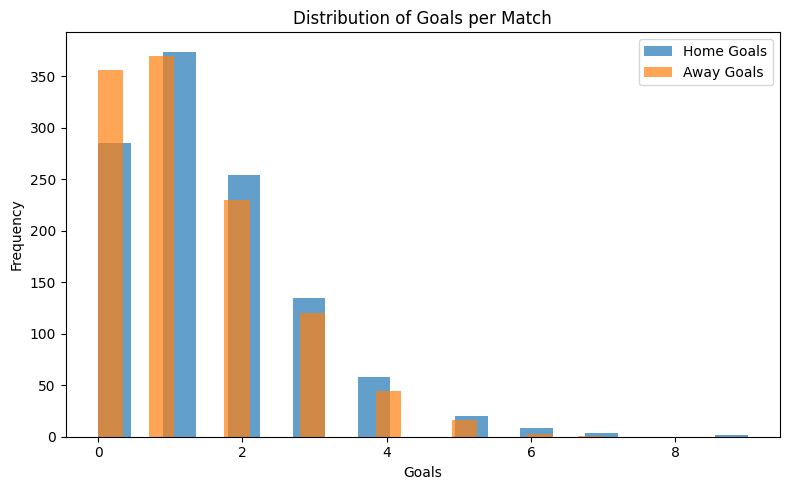

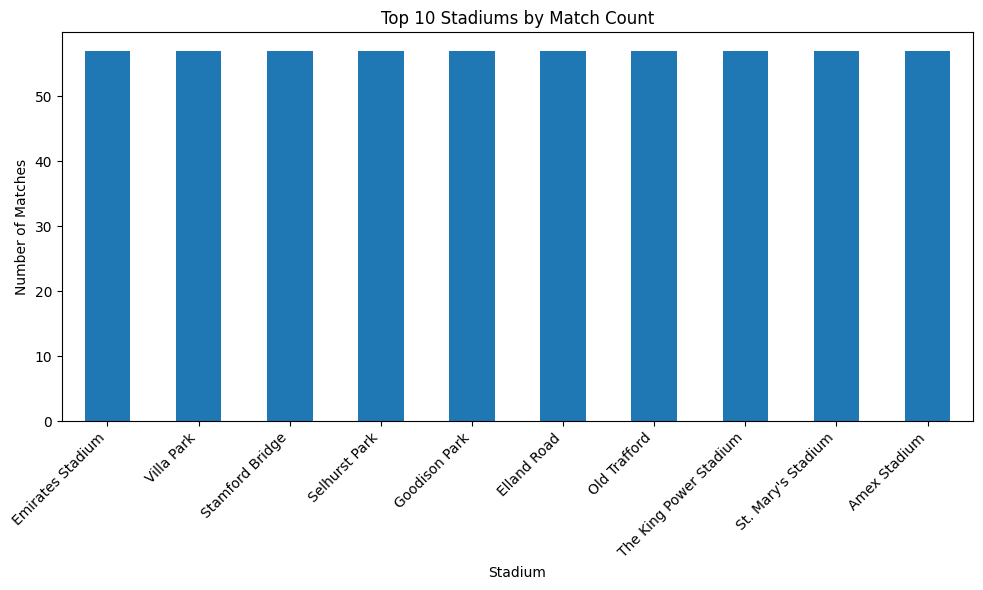

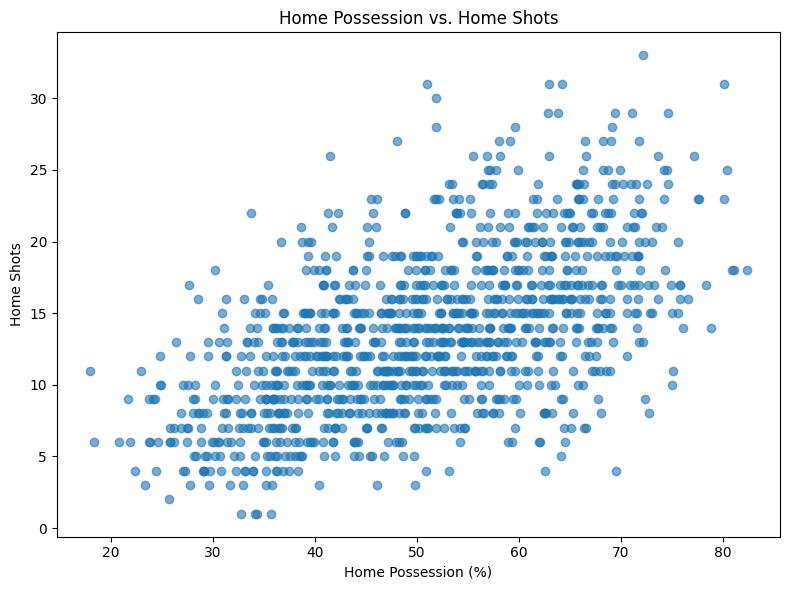

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load & light cleaning
df = pd.read_csv("mydata.csv")  

if "attendance" in df.columns:
    df["attendance"] = (
        df["attendance"]
        .astype(str)
        .str.replace(",", "", regex=False)
        .replace({"": np.nan})
        .astype(float)
    )

col_goals_h = "Goals Home"
col_goals_a = "Away Goals"
col_poss_h  = "home_possessions"
col_shots_h = "home_shots"
col_stadium = "stadium"

# 1. Descriptive statistics (numerical columns)
numeric_df = df.select_dtypes(include="number")

desc_stats = pd.DataFrame({
    "mean": numeric_df.mean(),
    "median": numeric_df.median(),
    "mode": numeric_df.mode().iloc[0],  # first mode in case of multiple
    "std_dev": numeric_df.std()
})

print("===== Descriptive Statistics for Numerical Columns =====")
print(desc_stats)

# 2. Frequency counts (categorical columns)
cat_cols = df.select_dtypes(include="object").columns

print("\n===== Frequency Counts for Categorical Columns =====")
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  # top 10

# 3. Visualizations

# Histogram of goals
plt.figure(figsize=(8, 5))
plt.hist(df[col_goals_h].dropna(), bins=20, alpha=0.7, label="Home Goals")
plt.hist(df[col_goals_a].dropna(), bins=20, alpha=0.7, label="Away Goals")
plt.title("Distribution of Goals per Match")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


# Bar chart of top stadiums
if col_stadium in df.columns:
    plt.figure(figsize=(10, 6))
    df[col_stadium].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 Stadiums by Match Count")
    plt.xlabel("Stadium")
    plt.ylabel("Number of Matches")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Scatter plot: home possession vs. home shots
if col_poss_h in df.columns and col_shots_h in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col_poss_h], df[col_shots_h], alpha=0.6)
    plt.title("Home Possession vs. Home Shots")
    plt.xlabel("Home Possession (%)")
    plt.ylabel("Home Shots")
    plt.tight_layout()
    plt.show()
